Importing the Libraries

In [34]:
import numpy as np  
import matplotlib.pyplot as plt 
from scipy.fftpack import fft, ifft, fftshift
from scipy.signal import hamming, firwin, freqz

Plotting the Noisy Signal (Sine of 2MHz + Sine of 20Mhz)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


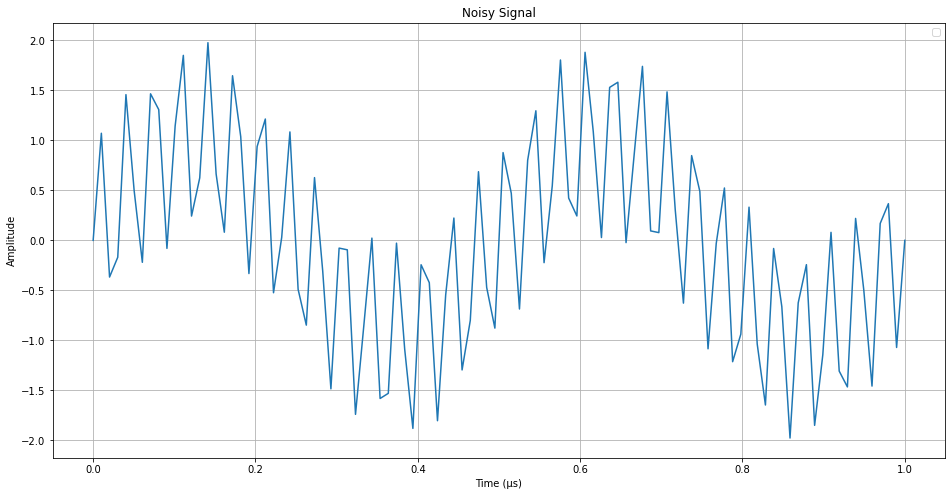

In [42]:
fs = 100 * 10**6                             # Sampling Frequency (100MHz)
duration = 1e-6                              # Duration of the Signal (1μs)
num_samples = int(duration * sampling_freq)  # Number of Samples

t = np.linspace(0, duration, num_samples)

freq_2MHz = 2 * 10**6
freq_30MHz = 30 * 10**6
sine_wave_2MHz = np.sin(2 * np.pi * freq_2MHz * t)
sine_wave_30MHz = np.sin(2 * np.pi * freq_30MHz * t)

noisy_signal = sine_wave_2MHz + sine_wave_30MHz

plt.figure(figsize=(16, 8))
plt.plot(t * 1e6, noisy_signal)
plt.title('Noisy Signal')
plt.xlabel('Time (μs)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

Plotting the DFT of the Noisy Signal

<StemContainer object of 3 artists>

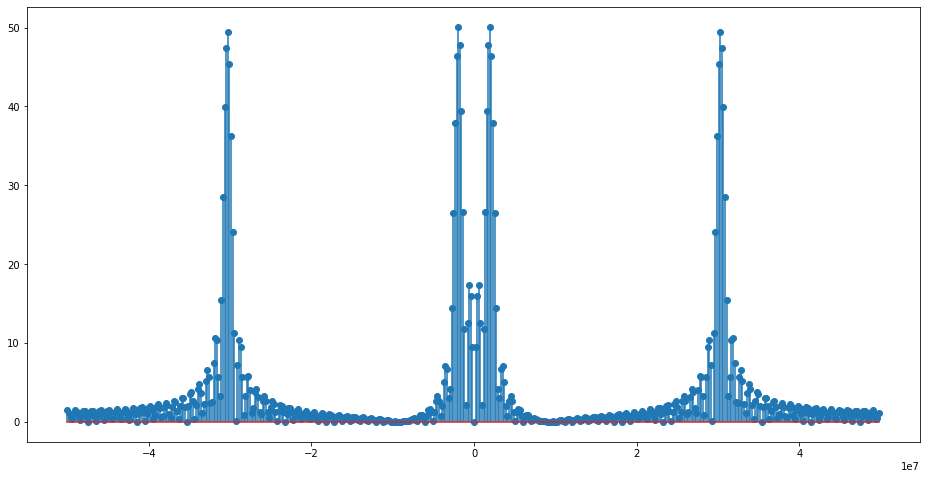

In [43]:
N = 2**9
X = fft(noisy_signal, N)
df = fs/N
X1 = fftshift(X)
sampleindex = np.arange(start=-N//2, stop=N//2)
f1 =sampleindex * df
plt.figure(figsize=(16, 8))
plt.stem(f1, abs(X1))

Finding the Filter Coefficents

In [44]:
N = 9              #Order of the Filter
fc = 10 * 10**6    #Cutoff Frequency

wn = hamming(N)
wc = (fc/fs) * np.pi
K = 1.414
T = (N-1)/2
hd = np.zeros(N)
h = np.zeros(N)
for n in range(N):
    if n == T:
        hd[n] = wc/np.pi
    else:
        hd[n] = np.sin(wc * (n-T))/(np.pi * (n-T))
    h[n] = hd[n] * wn[n]
    h[n] = h[n] * K

print(f'FIR Low Pass Filter Coefficients = {h}')

FIR Low Pass Filter Coefficients = [0.00856122 0.02606336 0.07143022 0.1203464  0.1414     0.1203464
 0.07143022 0.02606336 0.00856122]


In [45]:
h_fixed = np.round(h * 2**16)
h_fixed = (np.rint(h_fixed)).astype(int)
toHex = np.vectorize(hex)
coeff = list(toHex(h_fixed))
print(coeff)

['0x231', '0x6ac', '0x1249', '0x1ecf', '0x2433', '0x1ecf', '0x1249', '0x6ac', '0x231']


Plotting the DFT of the Filtered Signal

<StemContainer object of 3 artists>

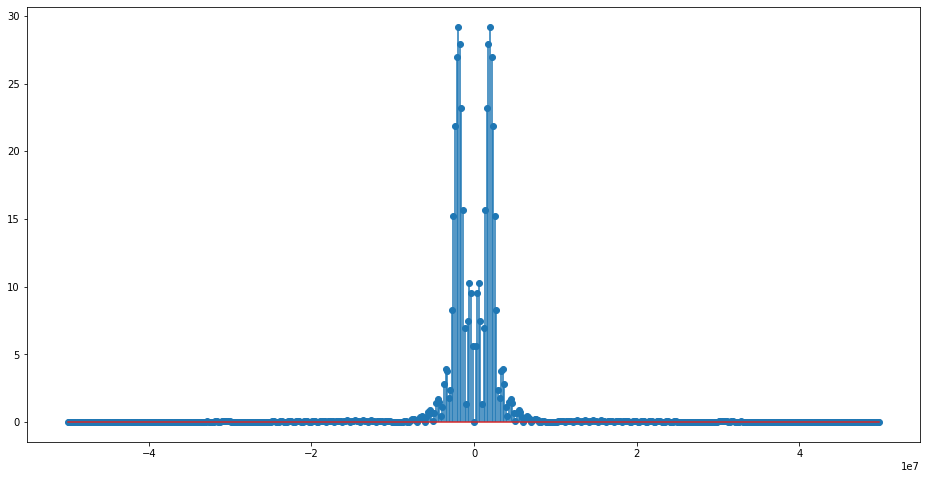

In [46]:
y = np.convolve(x,h)
N = 2**9
Y = fft(y,N)
df = fs/N
Y1 = fftshift(Y)
sampleindex = np.arange(start=-N//2,stop=N//2)
f1 =sampleindex * df
plt.figure(figsize=(16,8))
plt.stem(f1, abs(Y1))